In [53]:
import numpy as np
import pandas as pd
import operator

import matplotlib.pyplot as plt

In [54]:
train, val, test = pd.read_csv('train.csv'), pd.read_csv('val.csv'), pd.read_csv('test.csv')
concat = pd.concat([ train, val, test]).reset_index(drop=True)
concat.to_csv('dataset.csv', index=False)

In [68]:
def plot_bar(path, f_name):
    
    df = pd.read_csv(path)
    cols, counts = [], []

    for col in df.columns[1 : ]:

        cols.append(col)
        # print(cols)
        counts.append(np.sum(df[col].count()))
        # print(counts)
    
    label_count_dict = dict(zip(cols, counts))
    descending_labels = dict(sorted(label_count_dict.items(), key=operator.itemgetter(1),reverse=True))
    
    sentiment = descending_labels.keys()
    sentiment_count = descending_labels.values()
    sentiment, sentiment_count = zip(*descending_labels.items())
    
    plt.bar(sentiment, sentiment_count)
    plt.xticks(rotation = 45)
    plt.rcParams['figure.figsize'] = [12, 5]
    plt.rcParams['figure.autolayout'] = True
    plt.grid(axis = 'y')
    plt.savefig(f'{f_name}.eps', format="eps", dpi=1200, bbox_inches="tight", transparent=True)

    plt.show()

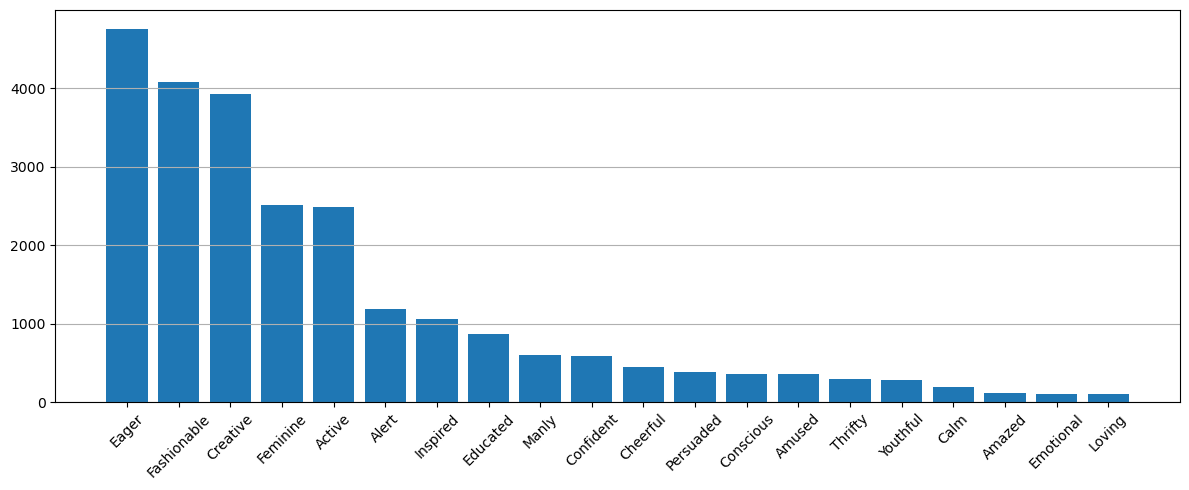

In [69]:
plot_bar('dataset.csv', 'dataset')

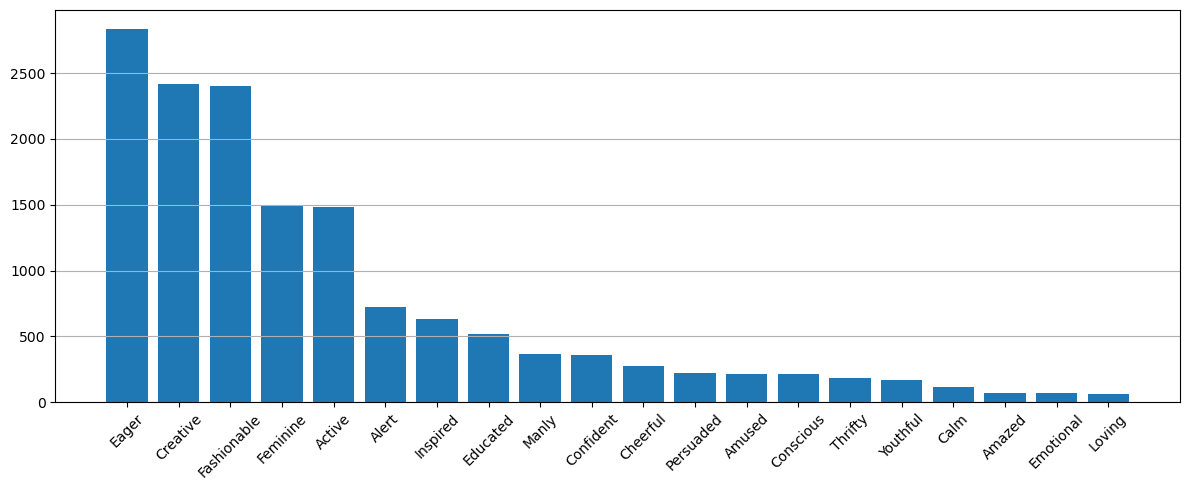

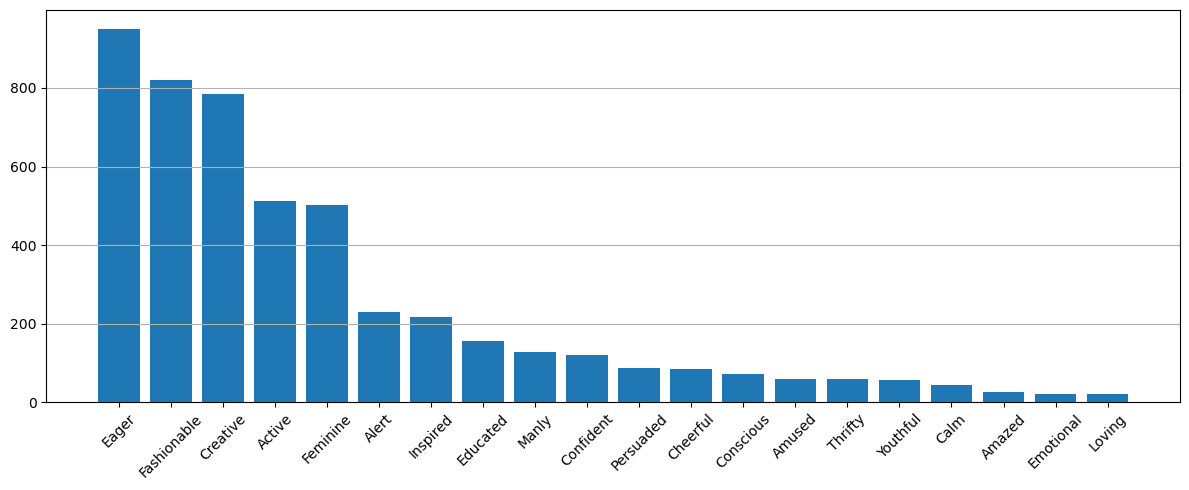

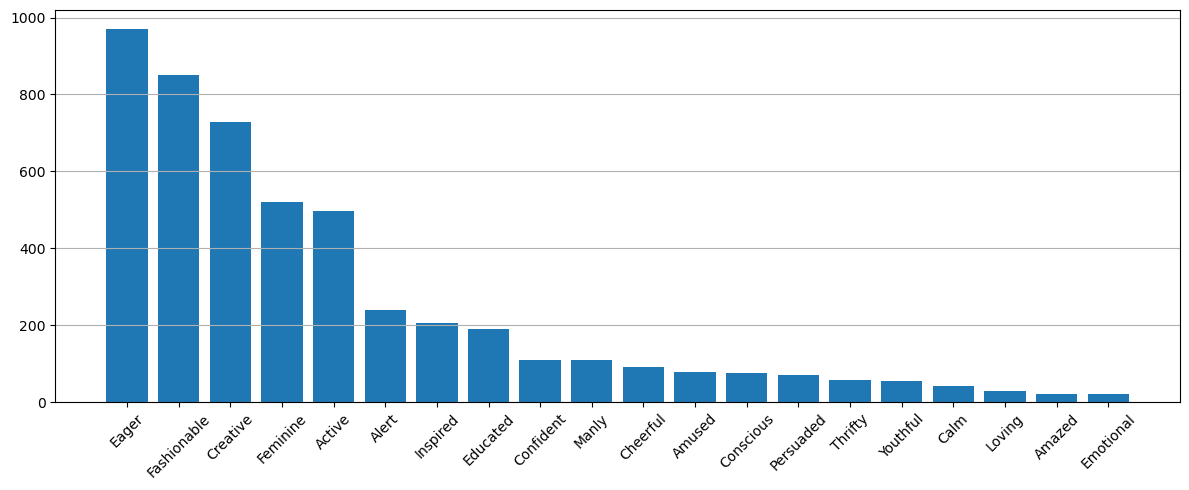

In [70]:
plot_bar('train.csv', 'train')
plot_bar('test.csv', 'test')
plot_bar('val.csv', 'val')